In [1]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

from dotenv import load_dotenv
from stable_baselines3 import PPO
from envionments.threshold_refinement import ThresholdRefinementEnv
from utility.dataset import load_pascal_voc2007, load_custom_dataset

load_dotenv()

VOC_ROOT = os.getenv("VOC_ROOT", "data/voc")
IMAGE_DIR = os.getenv("IMAGE_DIR")
LABEL_DIR = os.getenv("LABEL_DIR")
DATA_LIMIT = int(os.getenv("RL_DATA_LIMIT", "500"))
TOTAL_TIMESTEPS = int(os.getenv("RL_TOTAL_TIMESTEPS", "20000"))
LEARNING_RATE = float(os.getenv("RL_LEARNING_RATE", "3e-4"))

if IMAGE_DIR and LABEL_DIR:
    dataset = load_custom_dataset(IMAGE_DIR, LABEL_DIR, annotation_format="yolo_txt", limit=DATA_LIMIT)
else:
    dataset = load_pascal_voc2007(
        VOC_ROOT, image_set="trainval", limit=DATA_LIMIT, download=True
    )

env = ThresholdRefinementEnv(dataset)
model = PPO("MlpPolicy", env, verbose=1, learning_rate=LEARNING_RATE, n_steps=512)
model.learn(total_timesteps=TOTAL_TIMESTEPS)

model.save("rl_threshold_tuner")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0        |
| time/              |          |
|    fps             | 2        |
|    iterations      | 1        |
|    time_elapsed    | 239      |
|    total_timesteps | 512      |
---------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 1        |
|    ep_rew_mean          | 0        |
| time/                   |          |
|    fps                  | 2        |
|    iterations           | 2        |
|    time_elapsed         | 490      |
|    total_timesteps      | 1024     |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -1.42    |
|    explained_varia

{'episodes': 5, 'mean_final_iou': 0.0, 'std_final_iou': 0.0, 'mean_return': 0.0, 'mean_steps': 1.0}


<Axes: title={'center': 'Threshold trajectory per evaluation episode'}, xlabel='Step', ylabel='Confidence threshold'>

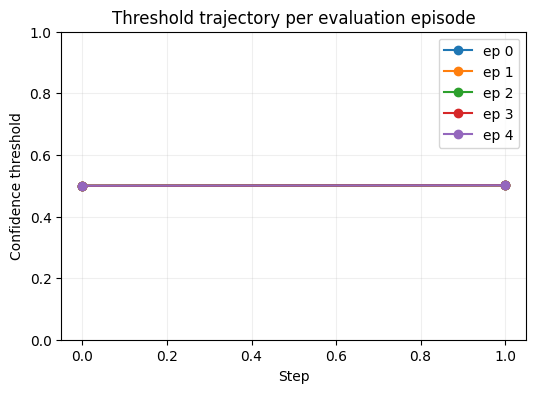

In [3]:
import os

from dotenv import load_dotenv
from utility.evaluation import evaluate_policy, summarize_stats, plot_threshold_trajectories

load_dotenv()
EVAL_EPISODES = int(os.getenv("RL_EVAL_EPISODES", "5"))

stats = evaluate_policy(model, dataset, episodes=EVAL_EPISODES)
summary = summarize_stats(stats)
print(summary)

plot_threshold_trajectories(stats)
